In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

File='/content/drive/My Drive/Dataset/COVID-19-CL/Data.First.60.Days.csv'

data = pd.read_csv(File, sep=';')
df=data
df.head()

,Day,Fecha,Japon,Espana,Alemania,Chile,Francia,Korea,Italia
0,1,1/22/20,2,0,0,0,0,1,0
1,2,1/23/20,1,0,0,0,0,1,0
2,3,1/24/20,2,0,0,0,2,2,0
3,4,1/25/20,2,0,0,0,3,2,0
4,5,1/26/20,4,0,0,0,3,3,0


In [0]:
 def create_df(pais):
    cols=pais
    dfNew= df[['Fecha',cols]]
    dfNew= dfNew[(dfNew[cols] > 0)]
    dfNew.reset_index(drop=True,level=0, inplace=True)
    dfNew.insert(0, 'Dia', range(1, 1 + len(dfNew)))
    
    return dfNew


In [68]:
#4 Paises
dfCL=create_df('Chile')
dfIT=create_df('Italia')
dfJP=create_df('Japon')
dfES=create_df('Espana')

DataMerge=dfCL.merge(dfIT, left_index=True, right_index=True)
DataMerge=DataMerge.merge(dfJP, left_index=True, right_index=True)
DataMerge=DataMerge.merge(dfES, left_index=True, right_index=True)

DataMerge= DataMerge[['Chile','Italia','Japon','Espana']]
DataMerge.reset_index(drop=True,level=0, inplace=True)
DataMerge.insert(0, 'Dia', range(1, 1 + len(DataMerge)))
DataMerge



,Dia,Chile,Italia,Japon,Espana
0,1,1,2,2,1
1,2,1,2,1,1
2,3,4,2,2,1
3,4,4,2,2,1
4,5,4,2,4,1
5,6,8,2,4,1
6,7,8,2,7,1
7,8,13,3,7,1
8,9,23,3,11,2
9,10,23,3,15,2


In [73]:
#2 Paises

dfIT=create_df('Italia')
dfES=create_df('Espana')

DataMerge=dfIT.merge(dfES, left_index=True, right_index=True)
DataMerge= DataMerge[['Italia','Espana']]
DataMerge.reset_index(drop=True,level=0, inplace=True)
DataMerge.insert(0, 'Dia', range(1, 1 + len(DataMerge)))
DataMerge.head()


,Dia,Italia,Espana
0,1,2,1
1,2,2,1
2,3,2,1
3,4,2,1
4,5,2,1


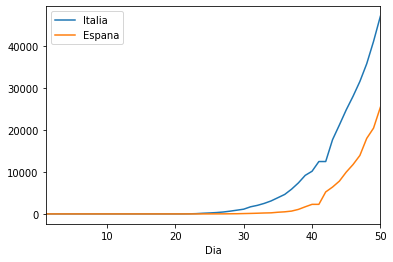

In [74]:
import matplotlib.pyplot as plt

DataMerge.plot(x='Dia')
    